EDA

In [1]:
#Importing dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , FunctionTransformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score
from sklearn.dummy import DummyRegressor, DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns 
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.inspection import permutation_importance
from sklearn.inspection import permutation_importance
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Creating dataframe with data files
df_desc = pd.read_csv("data/key.csv", index_col = 0)
y = pd.read_csv("data/Training data target.csv")
X= pd.read_csv("data/Training data.csv")

In [3]:
#Discription for the columns in the dataframe
df_desc

,Description
Key,
amount_tsh,Total static head (amount water available to w...
date_recorded,The date the row was entered
funder,Who funded the well
gps_height,Altitude of the well
installer,Organization that installed the well
longitude,GPS coordinate
latitude,GPS coordinate
wpt_name,Name of the waterpoint if there is one
basin,Geographic water basin


In [4]:
#Merging data to get a full picture
df = X.merge(y,on="id")

In [5]:
#Showing dataframe
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,5/3/2013,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,5/7/2011,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,4/11/2011,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,3/8/2011,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [6]:
#Dropping ID
df.drop("id",axis=1, inplace= True)

In [7]:
#Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

As we can see, there are 40 variables in our dataset, there are some null values that will need to be addressed later, and there are quite a few categorical variables

We will take a look at eatch column for EDA and address any flaws in the data

In [8]:
#Viewing each column to start our EDA 
df.columns

Index(['amount_tsh', 'date_recorded', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward',
       'population', 'public_meeting', 'recorded_by', 'scheme_management',
       'scheme_name', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

array([[<AxesSubplot:title={'center':'amount_tsh'}>,
        <AxesSubplot:title={'center':'gps_height'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'num_private'}>,
        <AxesSubplot:title={'center':'region_code'}>],
       [<AxesSubplot:title={'center':'district_code'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'construction_year'}>]], dtype=object)

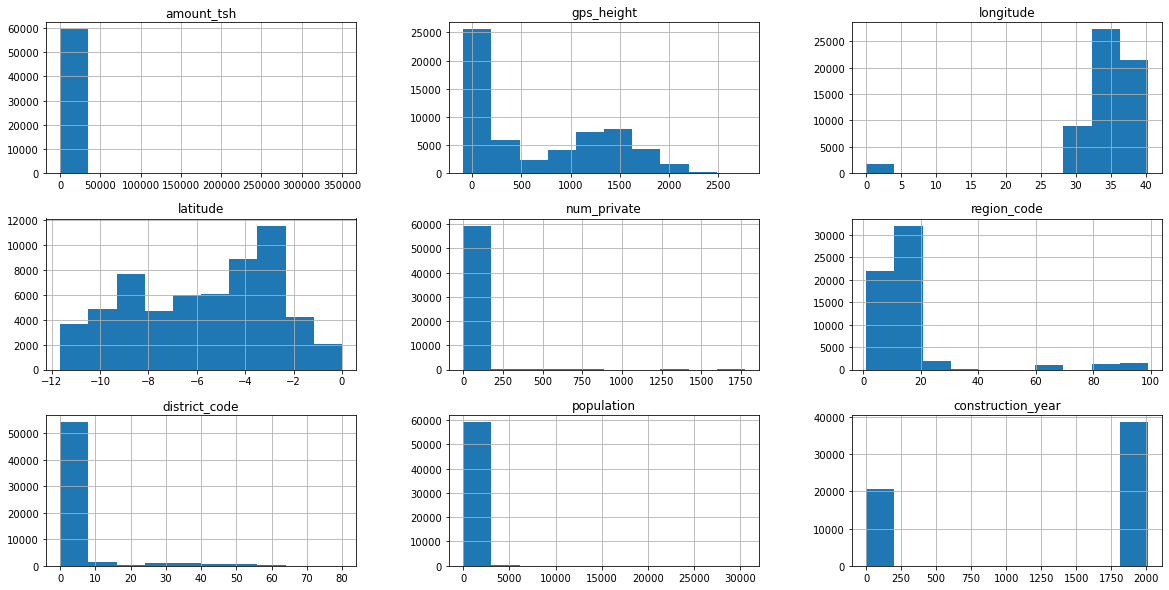

In [9]:
#Plotting numerical values in df
df.hist(figsize=(20,10))

amount_tsh

In [10]:
# There are significant amount of 0s, so we will drop this column 
df["amount_tsh"].value_counts()

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64

funder

In [11]:
#Looking at funder column, 1898 values
df["funder"].value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Lg                           1
Hesawwa                      1
Igolola Community            1
Marafin                      1
Taes                         1
Name: funder, Length: 1897, dtype: int64

In [12]:
#Exploring the top funders
df["funder"].value_counts().iloc[:20]

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
0                          777
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [13]:
#Checking for missing values
df["funder"].isna().sum()

3635

In [14]:
#Replacing missing values with other
df.funder.fillna("other", inplace=True)

In [15]:
#Replacing "0" with Other
df["funder"].replace("0", "other", inplace=True)

In [16]:
#Checking top 20 values in funder after replacing "0" and filling missing values
df["funder"].value_counts().iloc[:20]

Government Of Tanzania    9084
other                     4412
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

gps_height

In [17]:
#Exploring gps_height, about 1/2 are at 0 altitude with several being negative
df["gps_height"].describe()

count    59400.000000
mean       668.297239
std        693.116350
min        -90.000000
25%          0.000000
50%        369.000000
75%       1319.250000
max       2770.000000
Name: gps_height, dtype: float64

In [18]:
#2428 unique values
df["gps_height"].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

Installer

In [19]:
#Categorical, 
df["installer"].value_counts()

DWE                        17402
Government                  1825
RWE                         1206
Commu                       1060
DANIDA                      1050
                           ...  
Region Water Department        1
TLC/Emmanuel Kasoga            1
JACKSON MAHAMBO                1
Kassim                         1
WINAMU CO                      1
Name: installer, Length: 2145, dtype: int64

In [20]:
#Checking for missing values
df["installer"].isna().sum()

3655

In [21]:
#Exploring top 20 installers
df["installer"].value_counts().iloc[:20]

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

wpt_name

In [22]:
#Checking value counts for wpt_name, this value will be dropped as the name of the waterpoint does not matter in terms of functionality 
df["wpt_name"].value_counts()

none                      3563
Shuleni                   1748
Zahanati                   830
Msikitini                  535
Kanisani                   323
                          ... 
Kwa Clement                  1
Kwa Mohamed Ally Mtepe       1
Kwa Mwalimu Yuda             1
Mawine                       1
Matanki 4                    1
Name: wpt_name, Length: 37400, dtype: int64

waterpoint_type and waterpoint_type_group

In [23]:
df["waterpoint_type"].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [24]:
def perc_func(col):
    x = col
    y = 'status_group'

    df1 = df.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    df1 = df1[df1["status_group"] == "functional"]
    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
    g.fig.set_size_inches(16,10)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

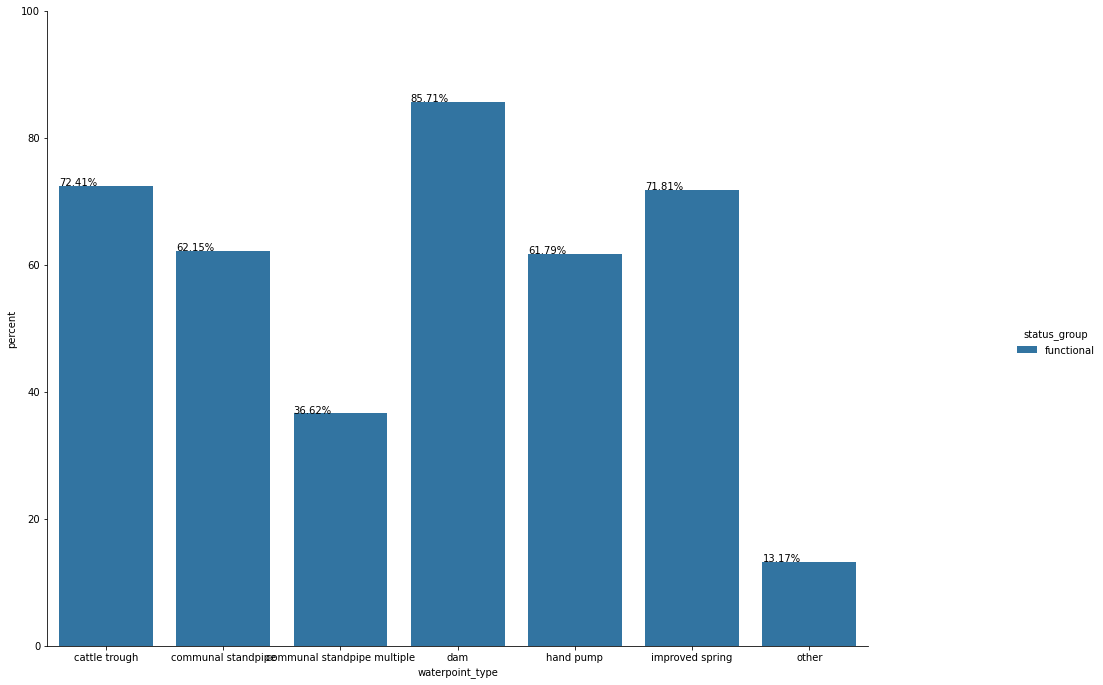

In [25]:
#Plotting waterpoint_type, significant amount of functional wells in communal standpipe and standpipe
#Significant amount of non functional wells where the waterpoint type is other
perc_func("waterpoint_type")

In [26]:
#Similar to waterpoint_type, will drop this later
df["waterpoint_type_group"].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

basin

In [27]:
#Checking value counts for basin
df["basin"].value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

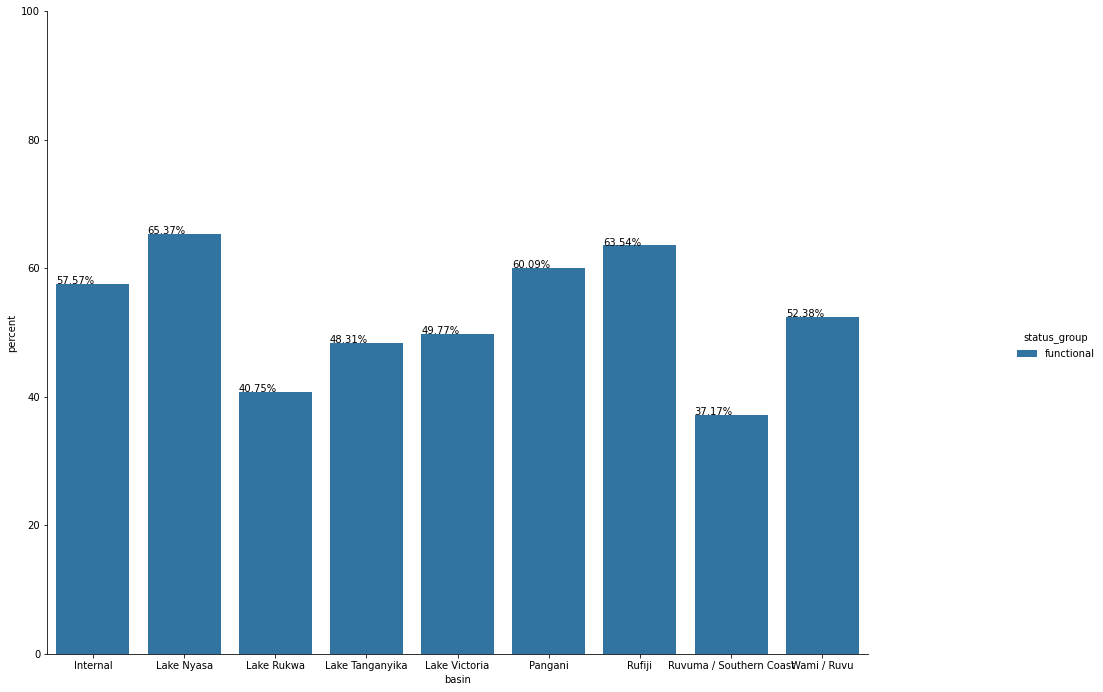

In [28]:
#Plotting basin
perc_func("basin")

subvillage

In [29]:
#Checking value counts for subvillage
df["subvillage"].value_counts()

Madukani     508
Shuleni      506
Majengo      502
Kati         373
Mtakuja      262
            ... 
Sezi           1
Gaudu B        1
Mtibwa         1
Ngasani A      1
Nyachonga      1
Name: subvillage, Length: 19287, dtype: int64

<AxesSubplot:xlabel='subvillage', ylabel='population'>

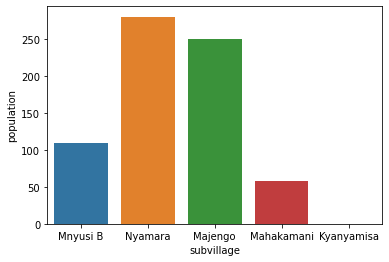

In [30]:
#Plotting subvillage
df['subvillage'].value_counts()
sns.barplot(x=df['subvillage'][:5], y=df['population'])

region and region_code

In [31]:
#Categorical, 
df["region"].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [32]:
#Categorical, has similar information to region, keeping region_code, dropping region
df["region_code"].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [33]:
df["region_code"].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

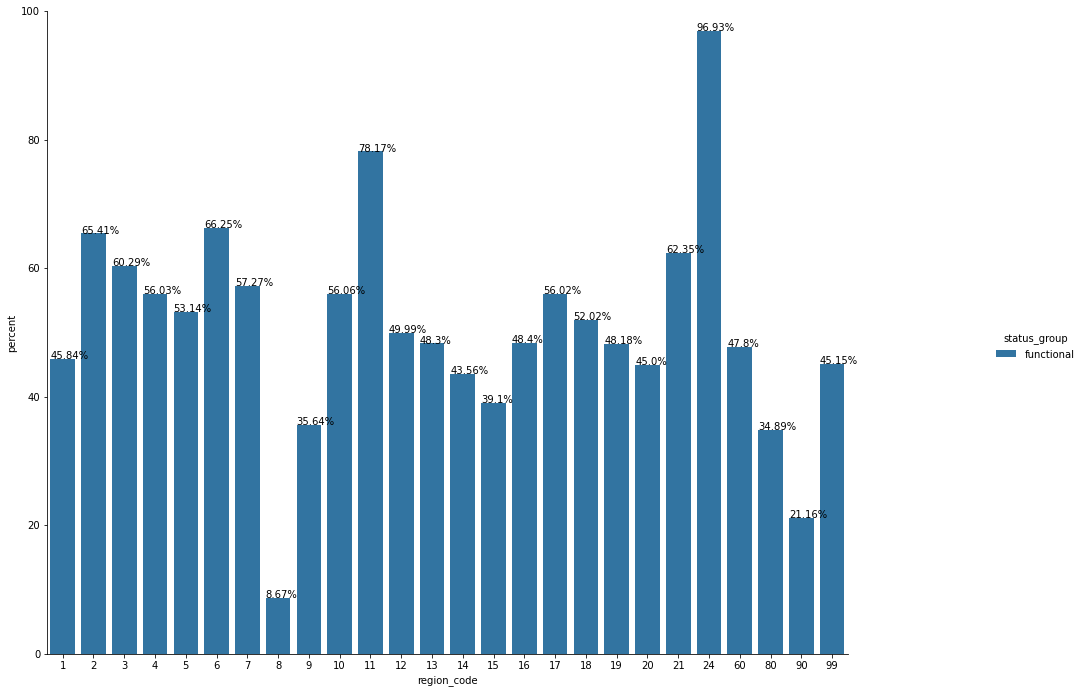

In [34]:
perc_func("region_code")

In [35]:
#Region code 12 has the highest non functional wells, region code 12 is Lindi
df.groupby("region_code")["status_group"].value_counts().sort_values(ascending=False).loc[: , ['non functional']].iloc[:1]

region_code  status_group  
12           non functional    1816
Name: status_group, dtype: int64

In [36]:
#the region code with the most functional needs repairs wells are in region code 17 which is Mtwara, in close proximity to Lindi
df.groupby("region_code")["status_group"].value_counts().sort_values(ascending=False).loc[: , ['functional needs repair']].iloc[:1]

region_code  status_group           
17           functional needs repair    638
Name: status_group, dtype: int64

district_code

In [37]:
#Checking district_code value counts
df["district_code"].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [38]:
#Checking for null values
df["district_code"].isna().sum()

0

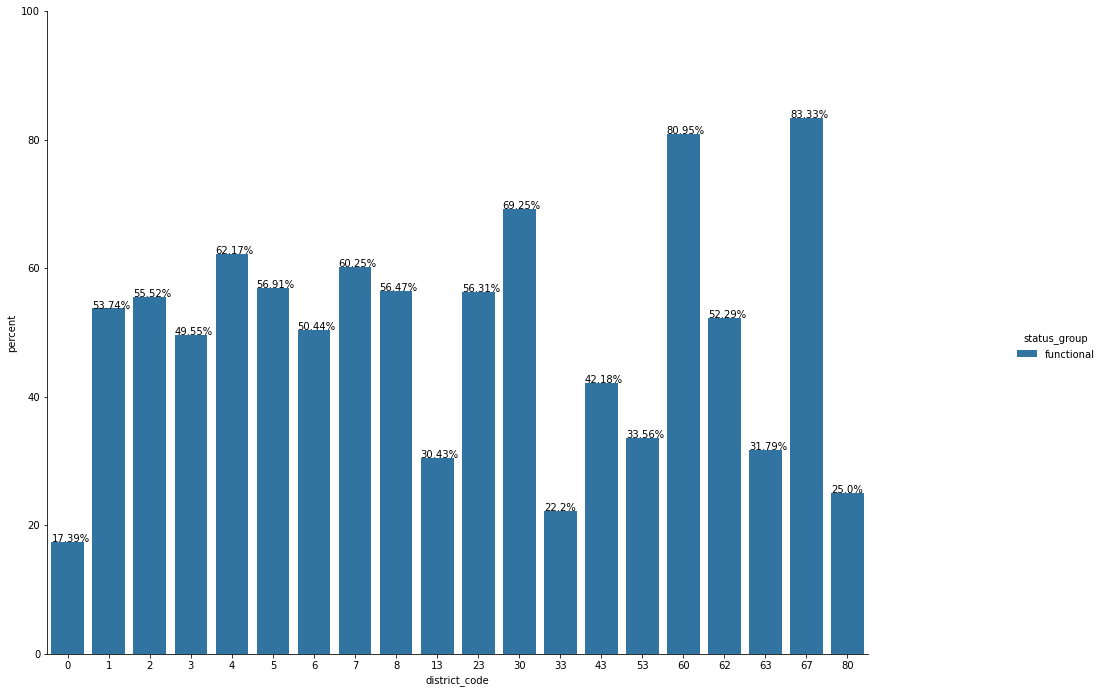

In [39]:
#Plotting district code, codes 1-4 have significantly more wells than other district codes 
perc_func("district_code")

lga

In [40]:
#
df["lga"].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

ward

In [41]:
#Dropping due to number of unique values due to ordinality
df["ward"].value_counts()

Igosi        307
Imalinyi     252
Siha Kati    232
Mdandu       231
Nduruma      217
            ... 
Kapilula       1
Mkumbi         1
Chinugulu      1
Igogo          1
Rasbura        1
Name: ward, Length: 2092, dtype: int64

population

In [42]:
#Numerical, population near the well
df["population"].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

public_meeting

In [43]:
#Bool
df["public_meeting"].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

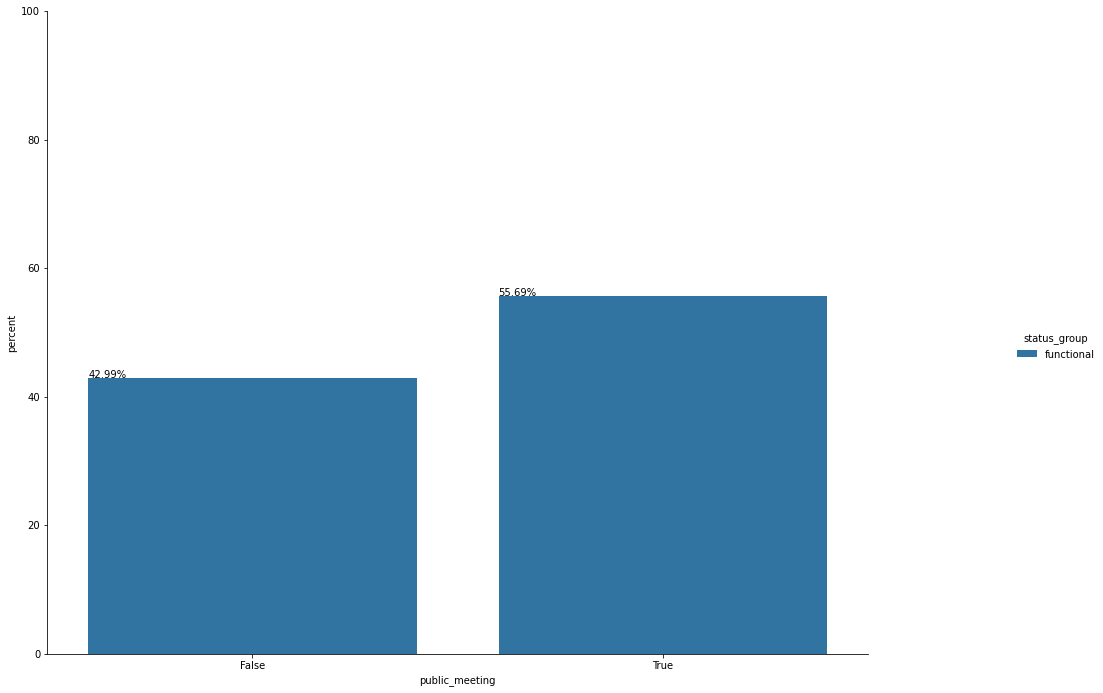

In [44]:
#Plotting public_meeting
perc_func("public_meeting")

scheme_management

In [45]:
df["scheme_management"].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [46]:
#Checking null values
df['scheme_management'].isnull().sum()

3877

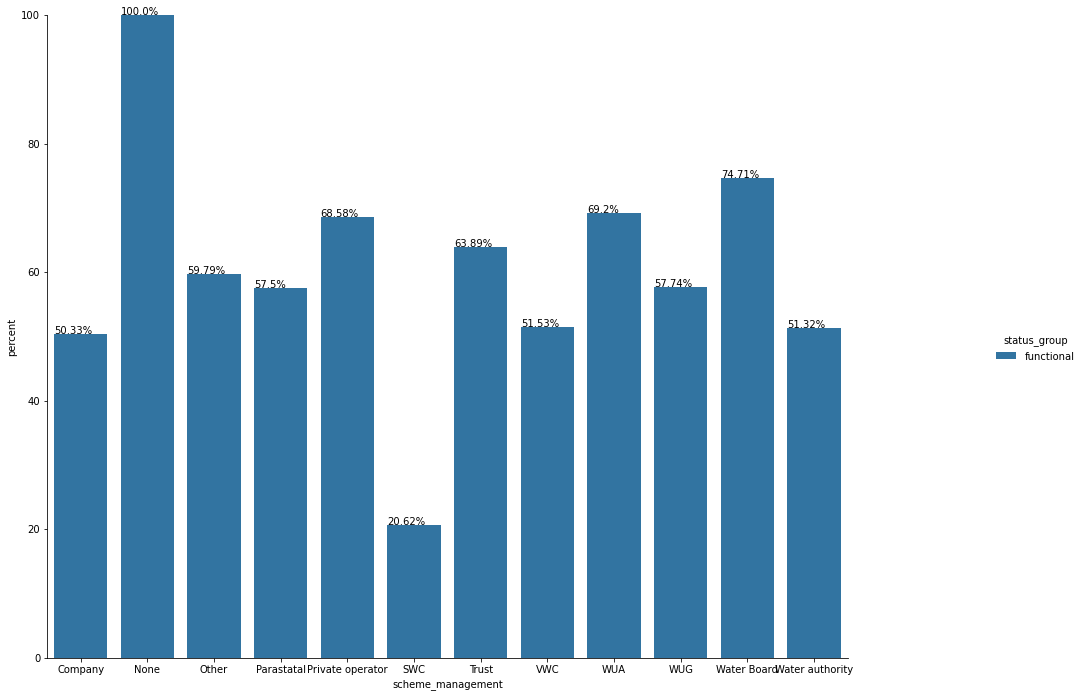

In [47]:
perc_func("scheme_management")

scheme_name

In [48]:
#Dropping due to ordinality
df['scheme_name'].value_counts()

K                           682
None                        644
Borehole                    546
Chalinze wate               405
M                           400
                           ... 
Tanload                       1
Mkuini paralle line           1
DMK                           1
Mrangamiza spring source      1
Tove -mtwango                 1
Name: scheme_name, Length: 2696, dtype: int64

permit

In [49]:
#Checking permit data
df["permit"].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [50]:
#Checking null values
df['permit'].isnull().sum()

3056

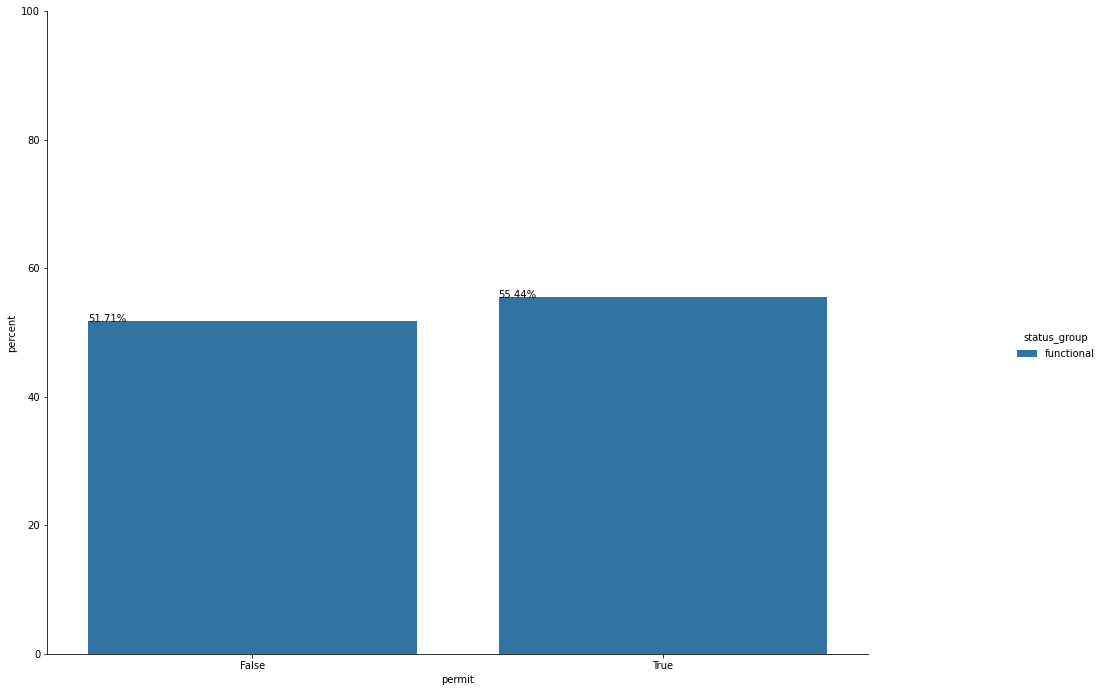

In [51]:
#Plotting permit
perc_func("permit")

construction_year

In [52]:
#Checking value counts for construction year, significant years have 0 as value
df["construction_year"].value_counts().iloc[:10]

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
Name: construction_year, dtype: int64

In [53]:
#Replacing 0 values with median
df['construction_year'] = df['construction_year'].replace(0, (df['construction_year'].median()))

In [54]:
#Checking construction year value counts
df["construction_year"].describe()

count    59400.000000
mean      1993.044293
std         11.308410
min       1960.000000
25%       1986.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [55]:
#Binning dates into decades
df['construction_year_bins'] = pd.cut(x=df['construction_year'], bins=[1960, 1970, 1980, 1990, 2000, 2010, 2013])

extraction_type, extraction_type_group and extraction_type_class

In [56]:
#Checking value counts for extraction type
df["extraction_type"].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [57]:
#Checking value counts for extraction_type_group
df["extraction_type_group"].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [58]:
#Checking value counts for extraction_type_class
#All 3 of these variables are telling the same story, will keep extraction_type_class and drop other 2
df["extraction_type_class"].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

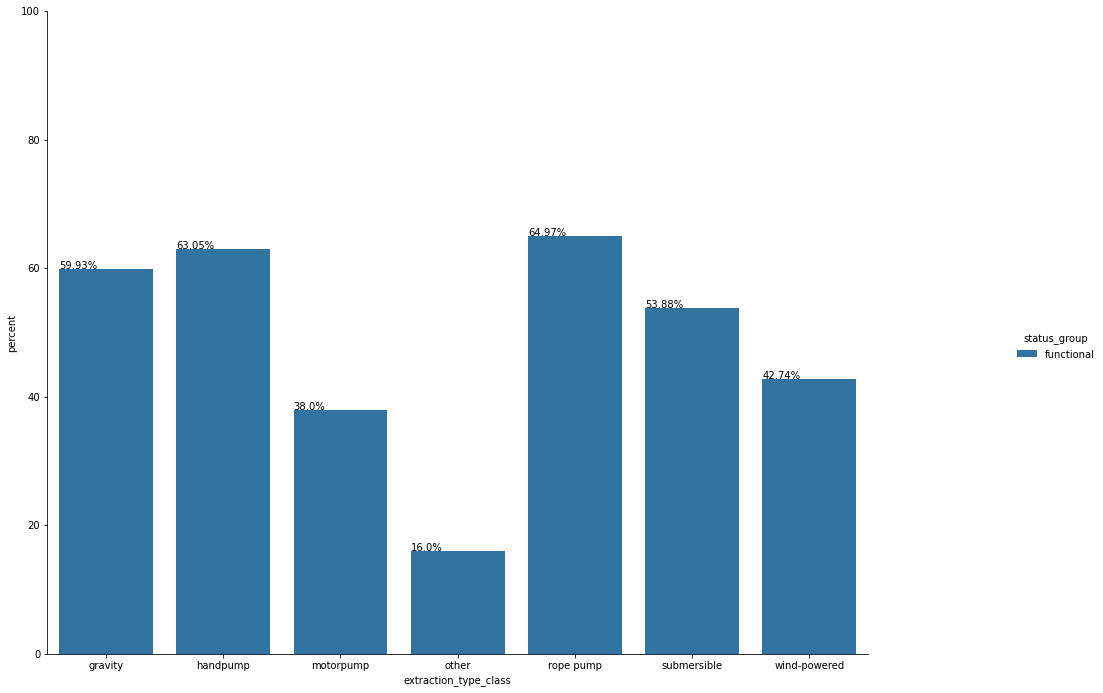

In [59]:
perc_func("extraction_type_class")

management & management_group

In [60]:
#Checking management value counts
df["management"].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [61]:
#Checking management_group value counts
#Will drop management_group later and keep management
df["management_group"].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

payment & payment_type

In [62]:
#Checking payment value counts
df["payment"].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [63]:
#Checking payment_type value counts
#Both variables are identical, dropping payment
df["payment_type"].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

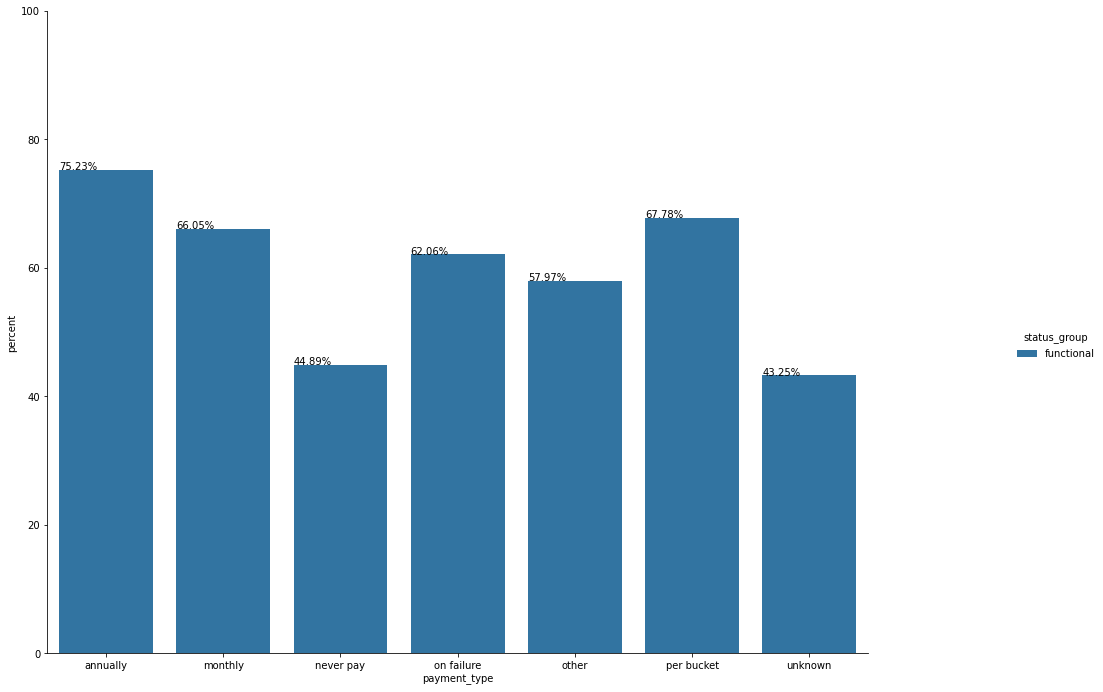

In [64]:
perc_func("payment_type")

water_quality & quality_group

In [65]:
#Checking value counts of water_quality
df["water_quality"].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [66]:
#Checking values counts of quality_group
df["quality_group"].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

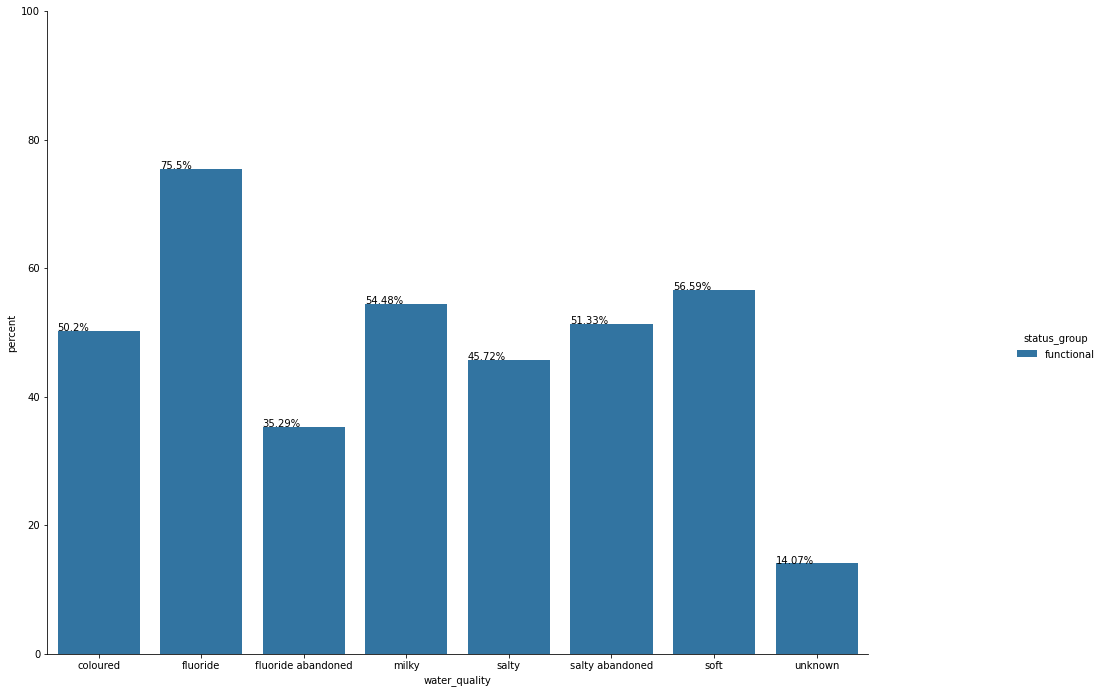

In [67]:
#Plotting
perc_func("water_quality")

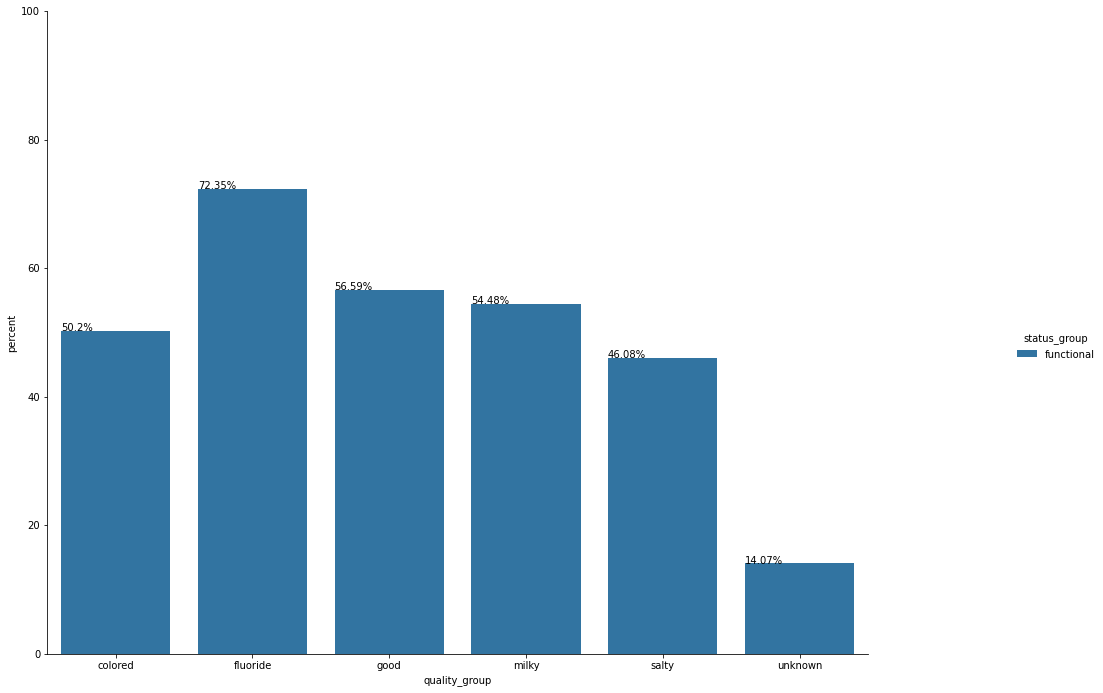

In [68]:
#Plotting
perc_func("quality_group")

quantity

In [69]:
#Checking value counts for quantity
df["quantity"].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

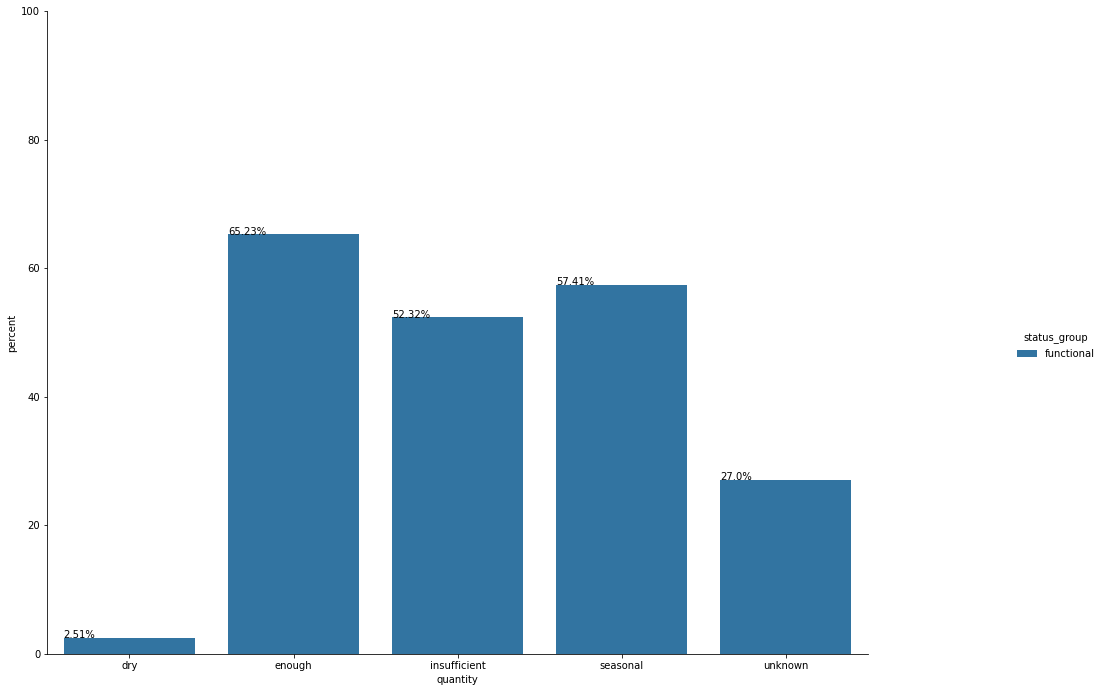

In [70]:
#Plotting quanity
#As expected wells that are dry are mostly non functional with enough and seasonal quantities of water having highest % functional
perc_func("quantity")

source, source_type and source_class

In [71]:
#Checking value counts for source
df["source"].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

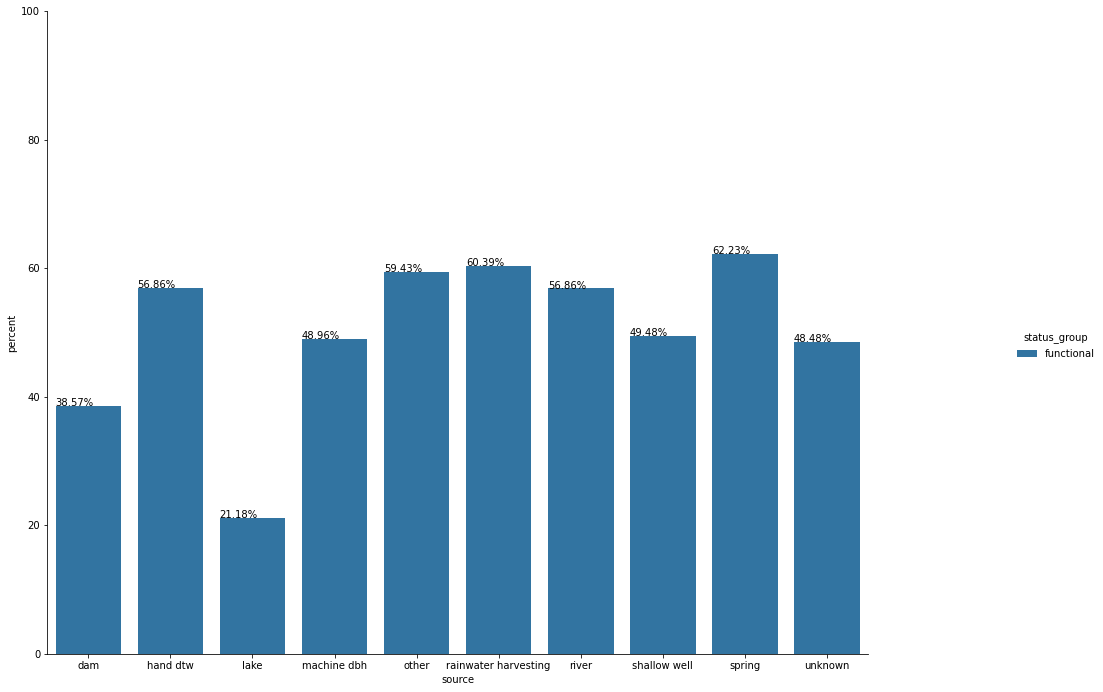

In [72]:
perc_func("source")

In [73]:
#Checking value counts for source
df["source_type"].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [74]:
#Checking value counts for source
#Source and source_type showing same information, will drop source_type later
df["source_class"].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [75]:
#Dropping the rows from df based on EDA
df= df.drop(["amount_tsh", "num_private","date_recorded","longitude", "latitude","waterpoint_type_group", "subvillage", "region" , "lga", "ward", "recorded_by", "scheme_management","scheme_name", "extraction_type",
            "extraction_type_group","management_group", "payment", "water_quality","quantity_group", "source_type", "construction_year"], axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   funder                  59400 non-null  object  
 1   gps_height              59400 non-null  int64   
 2   installer               55745 non-null  object  
 3   wpt_name                59400 non-null  object  
 4   basin                   59400 non-null  object  
 5   region_code             59400 non-null  int64   
 6   district_code           59400 non-null  int64   
 7   population              59400 non-null  int64   
 8   public_meeting          56066 non-null  object  
 9   permit                  56344 non-null  object  
 10  extraction_type_class   59400 non-null  object  
 11  management              59400 non-null  object  
 12  payment_type            59400 non-null  object  
 13  quality_group           59400 non-null  object  
 14  quantity              

In [77]:
#Creating function to pick top values in specified columns
def top_20(col):
    top_funders = df[col].value_counts().sort_values(ascending=False)[:20]
    df[col] = df.loc[:, col].map(lambda x: 'other' if x not in top_funders else x)
    return df[col].value_counts()

In [78]:
#Creating function to transform booleans to 1s and 0s
def bool_transf(col):
    df[col] = df[col].map({True : "1" , False  :"0"})
    return df[col].value_counts()

In [79]:
#Tranforming bool values to 1s and 0s
bool_transf("public_meeting")

1    51011
0     5055
Name: public_meeting, dtype: int64

In [80]:
#Tranforming bool values to 1s and 0s
bool_transf("permit")

1    38852
0    17492
Name: permit, dtype: int64

In [81]:
top_20("funder")

other                     30867
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       583
Dwe                         484
Name: funder, dtype: int64

In [82]:
top_20("installer")

other                 28207
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
World vision            408
LGA                     408
WEDECO                  397
TASAF                   396
District council        392
Name: installer, dtype: int64

In [83]:
top_20("wpt_name")

other              50104
none                3563
Shuleni             1748
Zahanati             830
Msikitini            535
Kanisani             323
Bombani              271
Sokoni               260
Ofisini              254
School               208
Shule Ya Msingi      199
Shule                152
Sekondari            146
Muungano             133
Mkombozi             111
Madukani             104
Mbugani               94
Hospital              94
Upendo                93
Kituo Cha Afya        90
Mkuyuni               88
Name: wpt_name, dtype: int64

Modeling

In [84]:
#To see an iterative approach to our models, check the model folder in the github repo
#If recreating notebook, save file and open new notebook for modeling
#df.to_csv("data/data_clean.csv")

In [85]:
#If recreating notebook from new page use below to open notebook to use for models
# df = pd.read_csv("data/data_clean.csv")
# df = df.drop("Unnamed: 0",axis=1)

In [86]:
#Checking dtypes in df
df.dtypes

funder                      object
gps_height                   int64
installer                   object
wpt_name                    object
basin                       object
region_code                  int64
district_code                int64
population                   int64
public_meeting              object
permit                      object
extraction_type_class       object
management                  object
payment_type                object
quality_group               object
quantity                    object
source                      object
source_class                object
waterpoint_type             object
status_group                object
construction_year_bins    category
dtype: object

In [87]:
#Creating function to convert categorical variables to object
def int_to_object(df):
    df["region_code"] = df["region_code"].astype(object)
    df["district_code"] = df["district_code"].astype(object)
    df["public_meeting"] = df["public_meeting"].astype(str)
    df["permit"] = df["permit"].astype(str)
    df["construction_year_bins"] = df["construction_year_bins"].astype(str)
    return df.dtypes

In [88]:
#Converting categorical variables to object
int_to_object(df)

funder                    object
gps_height                 int64
installer                 object
wpt_name                  object
basin                     object
region_code               object
district_code             object
population                 int64
public_meeting            object
permit                    object
extraction_type_class     object
management                object
payment_type              object
quality_group             object
quantity                  object
source                    object
source_class              object
waterpoint_type           object
status_group              object
construction_year_bins    object
dtype: object

In [89]:
#Splitting data in X and y for modeling
X = df.drop(["status_group"], axis=1)
y = df['status_group']

In [90]:
#Splitting the data to test train split with random state
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=465615615)

In [91]:
#Function to select dtype int64 from df
def grab_numeric(df):
    return df.select_dtypes(include=['int64'])

In [92]:
#Calling function
GrabNumeric = FunctionTransformer(grab_numeric)

In [93]:
#Creating pipeline 
pipe= Pipeline(steps=[("num", GrabNumeric),#Step 1 will pull the numerical values
                      ( "ss", StandardScaler())])#Step 2 will use standard scaler

In [94]:
#Fitting X_train to pipe
pipe.fit(X_train)

Pipeline(steps=[('num',
                 FunctionTransformer(func=<function grab_numeric at 0x0000025FD5507550>)),
                ('ss', StandardScaler())])

In [95]:
#Transforming X_train
pipe.transform(X_train)

array([[-0.84040878,  0.25062257],
       [-0.96708423, -0.38007373],
       [ 0.55590018,  0.29266899],
       ...,
       [-0.96708423, -0.38007373],
       [ 0.77614273, -0.37797141],
       [-0.96708423, -0.38007373]])

In [96]:
#Creating a for loop to find index of columns in df
j = -1
for i in X_train.columns:
    j+=1
    print("Index Number", j,i)

Index Number 0 funder
Index Number 1 gps_height
Index Number 2 installer
Index Number 3 wpt_name
Index Number 4 basin
Index Number 5 region_code
Index Number 6 district_code
Index Number 7 population
Index Number 8 public_meeting
Index Number 9 permit
Index Number 10 extraction_type_class
Index Number 11 management
Index Number 12 payment_type
Index Number 13 quality_group
Index Number 14 quantity
Index Number 15 source
Index Number 16 source_class
Index Number 17 waterpoint_type
Index Number 18 construction_year_bins


In [97]:
#Creating pipeline for numerical and categorical data transformation
subpipe_num = Pipeline(steps=[('num_impute', SimpleImputer(strategy="median")),#Replace missing values with median
                           ('ss', StandardScaler())])#use standard scaler for numerical values
subpipe_cat = Pipeline(steps=[('cat_impute', SimpleImputer(strategy='constant')),#Replace missing values with fill_value
                             ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))])#Use onehotencoder for categorical data

In [98]:
#Transforming columns that are numerical and categorical
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, [1,7]),#Choosing index location 1(gps_height) and 7(population) 
                                         ('subpipe_cat', subpipe_cat, [0,2,3,4,5,6,8,9,11,12,13,14,15,16,17,18])])#Choosing remaining index locations

In [99]:
#Creating function to evaluate models
def model_evaluation(model, X_train, y_train, X_test, y_test):
    print(f"""
    Training Accuracy Score: {round(accuracy_score(y_train, model.predict(X_train)),4)} 
    Testing Accuracy Score: {round(accuracy_score(y_test, model.predict(X_test)),4)}
    
    Training Precision Score: {round(precision_score(y_train, model.predict(X_train), average= 'weighted'),4)}
    Testing Precision Score: {round(precision_score(y_test, model.predict(X_test), average= 'weighted'),4)} 
    
    Training Recall Score: {round(recall_score(y_train, model.predict(X_train), average= 'weighted'),4)}
    Testing Recall Score: {round(recall_score(y_test, model.predict(X_test), average= 'weighted'),4)} 
    
    Training F1 Score: {round(f1_score(y_train, model.predict(X_train), average= 'weighted'),4)}
    Testing F1 Score: {round(f1_score(y_test, model.predict(X_test), average= 'weighted'),4)} 
    
    Confusion Matrix:""")     
    fig, ax = plt.subplots(figsize=(8, 8))
    plot_confusion_matrix(model, X_test, y_test, normalize = 'true', display_labels = ['Functional', 'Functional Needs Repair', 'Nonfunctional'],ax=ax)                        
                                 

Dummy Classifier

In [100]:
dummy_model_pipe = Pipeline(steps=([("ct", CT), 
                                    ("dc", DummyClassifier())]))
dummy_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               


    Training Accuracy Score: 0.447 
    Testing Accuracy Score: 0.4494
    
    Training Precision Score: 0.4473
    Testing Precision Score: 0.4576 
    
    Training Recall Score: 0.4454
    Testing Recall Score: 0.4493 
    
    Training F1 Score: 0.4506
    Testing F1 Score: 0.4507 
    
    Confusion Matrix:


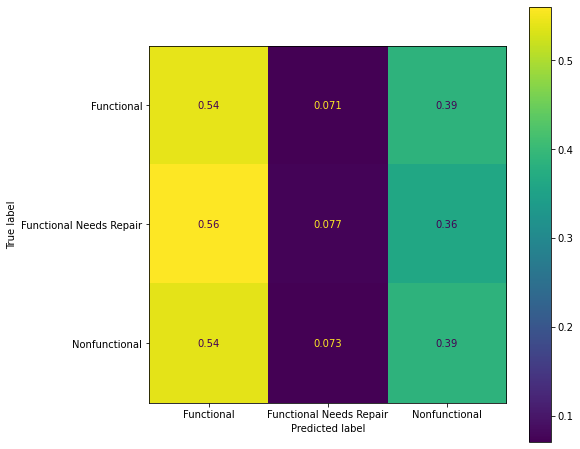

In [101]:
#Evaluating dummy model
model_evaluation(dummy_model_pipe, X_train, y_train, X_test, y_test)

In [102]:
#Setting up pipeline for logistic regression
log_reg_model_pipe = Pipeline(steps=([("ct", CT), 
                                    ("dt", LogisticRegression(solver="sag", penalty= "l2", max_iter=500))]))
log_reg_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [103]:
#Fitting pipeline
log_reg_model_pipe.score(X_train, y_train)

0.7451178451178451


    Training Accuracy Score: 0.7451 
    Testing Accuracy Score: 0.7432
    
    Training Precision Score: 0.7422
    Testing Precision Score: 0.7376 
    
    Training Recall Score: 0.7451
    Testing Recall Score: 0.7432 
    
    Training F1 Score: 0.7248
    Testing F1 Score: 0.7223 
    
    Confusion Matrix:


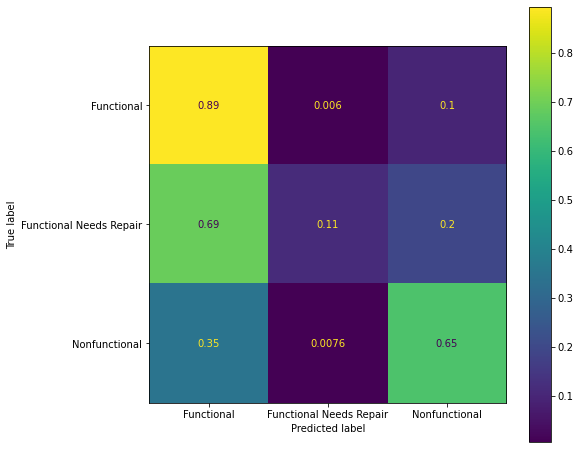

In [104]:
#Evaluating logistic regression model
model_evaluation(log_reg_model_pipe, X_train, y_train, X_test, y_test)

DecisionTreeClassifier

In [105]:
#Setting up pipeline for DecisionTreeClassifier and fitting 
dt_model_pipe = Pipeline(steps=([("ct", CT), 
                                    ("dt", DecisionTreeClassifier(max_depth=32, min_samples_leaf=15))]))
dt_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [106]:
#Score for DecisionTreeClassifier
dt_model_pipe.score(X_train, y_train)

0.8


    Training Accuracy Score: 0.8 
    Testing Accuracy Score: 0.7621
    
    Training Precision Score: 0.7944
    Testing Precision Score: 0.7526 
    
    Training Recall Score: 0.8
    Testing Recall Score: 0.7621 
    
    Training F1 Score: 0.7904
    Testing F1 Score: 0.7509 
    
    Confusion Matrix:


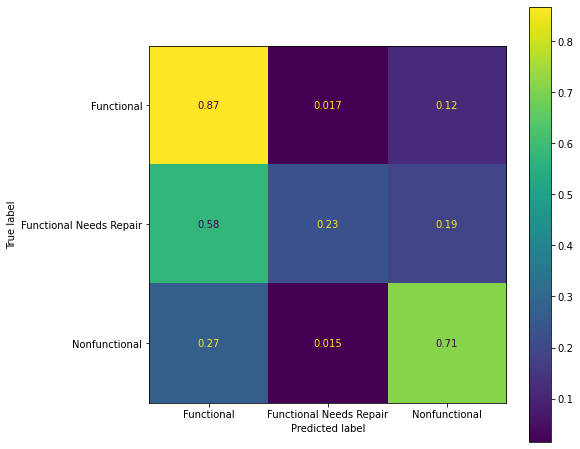

In [107]:
#Evaluating DecisionTreeClassifier model
model_evaluation(dt_model_pipe, X_train, y_train, X_test, y_test)

ExtraTreesClassifier

In [108]:
etc_model_pipe = Pipeline(steps=([("ct", CT), 
                                    ("etc", ExtraTreesClassifier(min_samples_split=15, n_estimators=1500))]))
etc_model_pipe.fit(X_train, y_train)


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [109]:
etc_model_pipe.score(X_train, y_train)

0.8712682379349046


    Training Accuracy Score: 0.8713 
    Testing Accuracy Score: 0.7933
    
    Training Precision Score: 0.8714
    Testing Precision Score: 0.7865 
    
    Training Recall Score: 0.8713
    Testing Recall Score: 0.7933 
    
    Training F1 Score: 0.8654
    Testing F1 Score: 0.7825 
    
    Confusion Matrix:


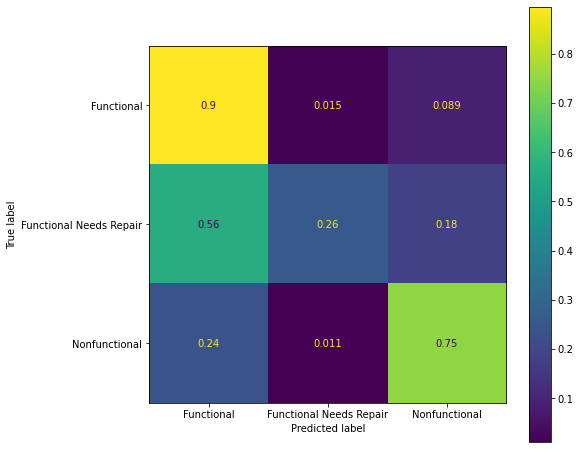

In [110]:
model_evaluation(etc_model_pipe, X_train, y_train, X_test, y_test)

RandomForestClassifier

In [111]:
#Setting up RandomForestClassifier pipeline and fitting
rfc_ = RandomForestClassifier(random_state=42, max_depth=32, max_samples=0.9,  min_samples_leaf=2, n_estimators=300, n_jobs=-1)
rfc_pipe= Pipeline([("ct", CT), ('rfc_8', rfc_)])
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [112]:
#RandomForestClassifier score
rfc_pipe.score(X_train, y_train)

0.849270482603816


    Training Accuracy Score: 0.8493 
    Testing Accuracy Score: 0.7983
    
    Training Precision Score: 0.8514
    Testing Precision Score: 0.7963 
    
    Training Recall Score: 0.8493
    Testing Recall Score: 0.7983 
    
    Training F1 Score: 0.8395
    Testing F1 Score: 0.7849 
    
    Confusion Matrix:


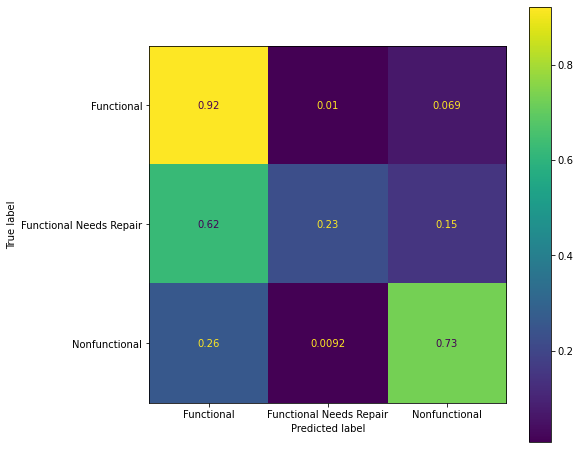

In [113]:
#RandomForestClassifier model evaluation
model_evaluation(rfc_pipe, X_train, y_train, X_test, y_test)

HistGradientBoostingClassifier

In [114]:
#Setting up pipeline for HistGradientBoostingClassifier
hgb_model_pipe = Pipeline([('ct', CT), ('hgb', HistGradientBoostingClassifier(max_depth=14, max_iter=500, min_samples_leaf=12, random_state=42))])

In [115]:
#Fitting pipeline to X_train and y_train
hgb_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [116]:
#Scoring the HistGradientBoostingClassifier model
hgb_model_pipe.score(X_train, y_train)

0.8358024691358025


    Training Accuracy Score: 0.8358 
    Testing Accuracy Score: 0.7873
    
    Training Precision Score: 0.8394
    Testing Precision Score: 0.783 
    
    Training Recall Score: 0.8358
    Testing Recall Score: 0.7873 
    
    Training F1 Score: 0.8285
    Testing F1 Score: 0.7755 
    
    Confusion Matrix:


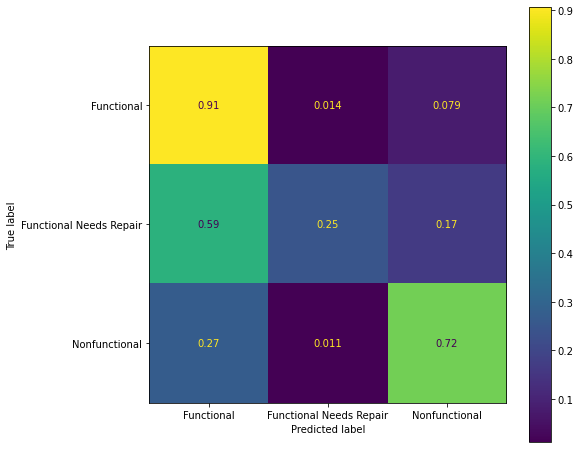

In [117]:
model_evaluation(hgb_model_pipe, X_train, y_train, X_test, y_test)

CatBoostClassifier

In [118]:
#Creating CatBoostClassifier pipeline and fitting
cat_boost_pipe = Pipeline([('ct', CT), ('cat', CatBoostClassifier(iterations=10000, od_type = "Iter", od_wait=1000, ))])
cat_boost_pipe.fit(X_train, y_train)

Learning rate set to 0.013722
0:	learn: 1.0889097	total: 175ms	remaining: 29m 14s
1:	learn: 1.0791243	total: 185ms	remaining: 15m 24s
2:	learn: 1.0699019	total: 194ms	remaining: 10m 45s
3:	learn: 1.0609414	total: 203ms	remaining: 8m 27s
4:	learn: 1.0524650	total: 211ms	remaining: 7m 2s
5:	learn: 1.0439436	total: 220ms	remaining: 6m 7s
6:	learn: 1.0356772	total: 230ms	remaining: 5m 27s
7:	learn: 1.0278454	total: 239ms	remaining: 4m 58s
8:	learn: 1.0202121	total: 249ms	remaining: 4m 35s
9:	learn: 1.0126107	total: 258ms	remaining: 4m 17s
10:	learn: 1.0054710	total: 267ms	remaining: 4m 2s
11:	learn: 0.9985550	total: 276ms	remaining: 3m 49s
12:	learn: 0.9916009	total: 286ms	remaining: 3m 39s
13:	learn: 0.9849403	total: 295ms	remaining: 3m 30s
14:	learn: 0.9783158	total: 305ms	remaining: 3m 22s
15:	learn: 0.9721045	total: 314ms	remaining: 3m 15s
16:	learn: 0.9661388	total: 323ms	remaining: 3m 9s
17:	learn: 0.9603121	total: 334ms	remaining: 3m 5s
18:	learn: 0.9544949	total: 343ms	remaining: 3

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  [1, 7]),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                               

In [119]:
#CatBoostClassifier score
cat_boost_pipe.score(X_train, y_train)

0.8272278338945006


    Training Accuracy Score: 0.8272 
    Testing Accuracy Score: 0.7907
    
    Training Precision Score: 0.8283
    Testing Precision Score: 0.7863 
    
    Training Recall Score: 0.8272
    Testing Recall Score: 0.7907 
    
    Training F1 Score: 0.8182
    Testing F1 Score: 0.7784 
    
    Confusion Matrix:


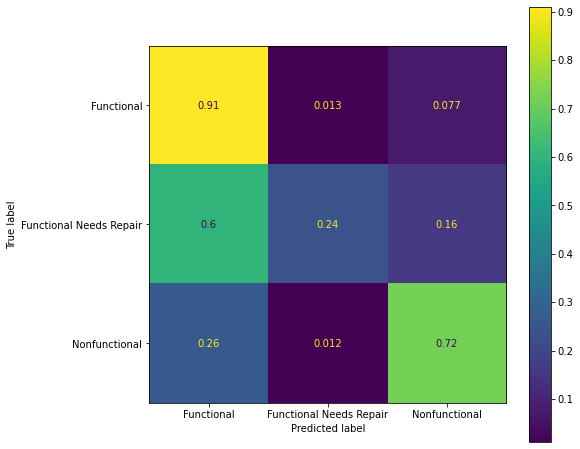

In [120]:
model_evaluation(cat_boost_pipe, X_train, y_train, X_test, y_test)

Permutation Importance and Confusion Matrix

In [121]:
result = permutation_importance(rfc_pipe, X_test, y_test)

In [122]:
result = permutation_importance(cat_boost_pipe, X_test, y_test)

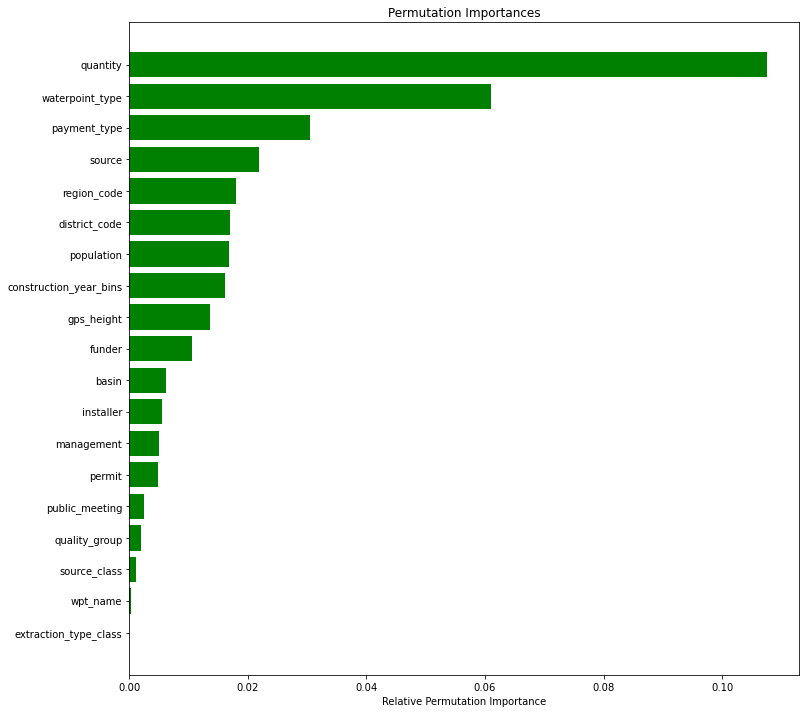

In [123]:
Permutation_names = list(X.columns)
Permutations = abs(result.importances_mean)
indices = np.argsort(Permutations)
plt.figure(figsize=(12,12))
plt.title('Permutation Importances')
plt.barh(range(len(indices)), Permutations[indices], color= 'g')
plt.yticks(range(len(indices)), [Permutation_names[i] for i in indices])
plt.xlabel('Relative Permutation Importance')
plt.savefig('perm.png')
plt.show()

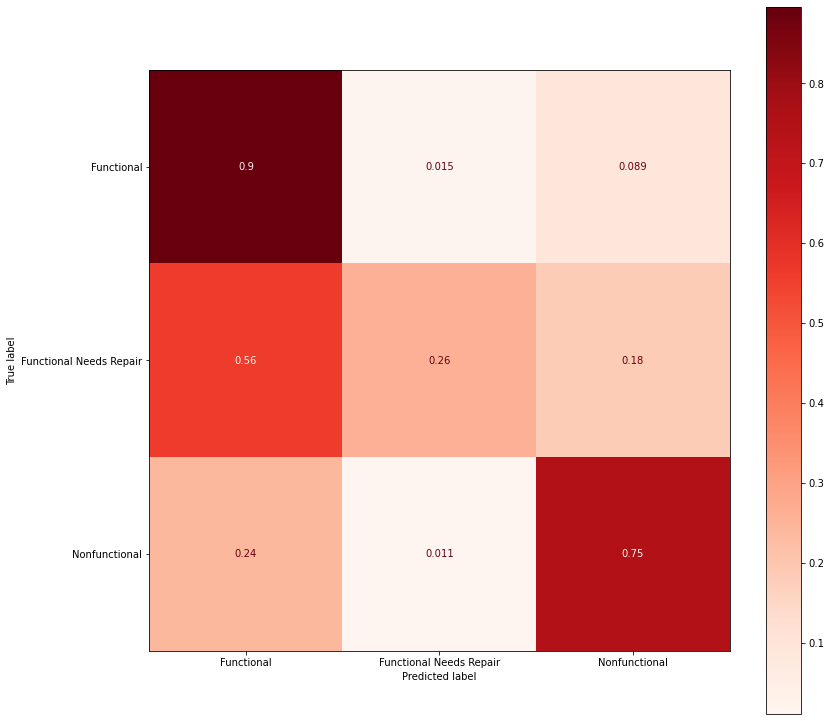

In [124]:
fig, ax = plt.subplots(figsize=(13, 13))
plot_confusion_matrix(etc_model_pipe, X_test, y_test, cmap=plt.cm.Reds, normalize = 'true', display_labels = ['Functional', 'Functional Needs Repair', 'Nonfunctional'], ax=ax);

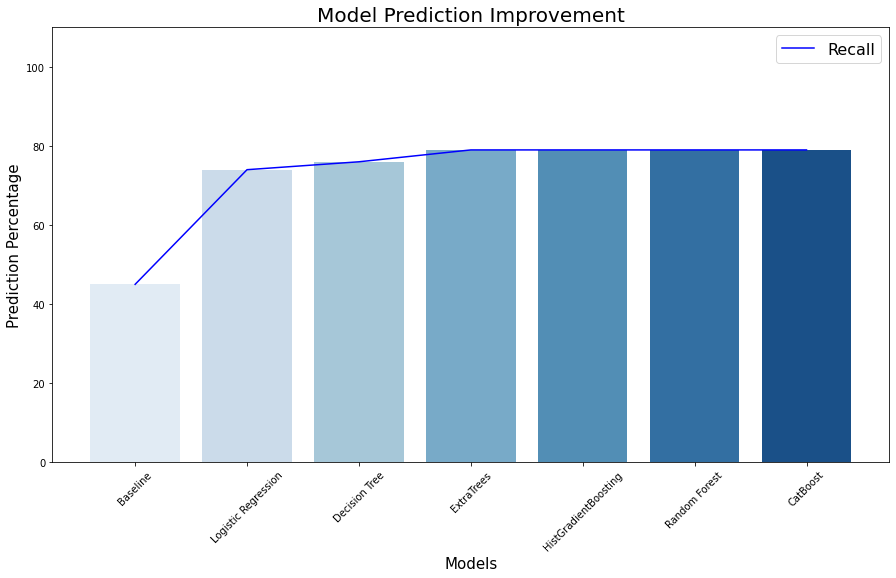

In [125]:
fig, ax = plt.subplots(figsize=(15, 8))
Percent_Accuracy = [45, 74, 76, 79, 79, 79, 79]
Percent_Precision = [45, 74, 76, 79, 79, 79, 79]
Models = ["Baseline", "Logistic Regression", "Decision Tree", "ExtraTrees", "HistGradientBoosting", "Random Forest", "CatBoost"]
ax = sns.barplot(x = Models, y = Percent_Accuracy, palette='Blues')
ax = sns.lineplot(x = Models, y = Percent_Precision, color='blue', label='Recall')
plt.xticks(rotation=45)
ax.set_ylim(0, 110)
ax.set_title("Model Prediction Improvement", fontsize=20)
ax.set_xlabel("Models", fontsize=15)
ax.set_ylabel("Prediction Percentage", fontsize=15)
plt.legend(fontsize=16)
sns.axes_style("whitegrid");
